In [1]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [2]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '06714215'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2021-01-02', end='2022-01-03')
df

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
2021-01-02 00:00:00+00:00,8.1,A,06714215,3.8,A,5.6,A,3.60,A
2021-01-03 00:00:00+00:00,8.0,A,06714215,3.4,A,5.5,A,3.53,A
2021-01-04 00:00:00+00:00,8.5,A,06714215,3.8,A,6.0,A,3.55,A
2021-01-05 00:00:00+00:00,8.9,A,06714215,4.7,A,6.6,A,3.46,A
2021-01-06 00:00:00+00:00,8.2,A,06714215,4.1,A,5.9,A,3.51,A
...,...,...,...,...,...,...,...,...,...
2021-12-30 00:00:00+00:00,7.7,A,06714215,3.7,A,5.6,A,17.00,P
2021-12-31 00:00:00+00:00,8.5,A,06714215,4.9,A,6.4,A,10.60,P
2022-01-01 00:00:00+00:00,6.4,A,06714215,4.6,A,5.4,A,5.47,P


<AxesSubplot:xlabel='datetime'>

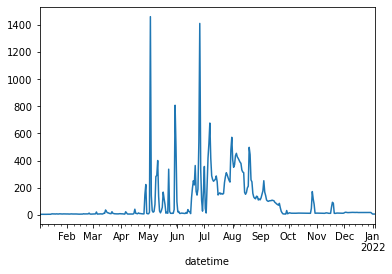

In [3]:
# Simple plot
df['00060_Mean'].plot()

This plot is showing daily mean discharge of SOUTH PLATTE R AT 64TH AVE. COMMERCE CITY, Colorado from 2021-01-02 to 2022-01-03. The maximum spike is in May. July has a significant spike as well. 

In [4]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [5]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

In [6]:
# Print number of tables on webpage
len(mountains)

13

In [7]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [8]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [9]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [10]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

In [11]:
# Have a look at the location object
mountain_stats['Location'].iloc[0]

'45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W'

In [12]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [13]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [14]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

In [15]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

Question 2:

In [16]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '06714215'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-10-31', end='2021-09-30')
df

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
2020-10-31 00:00:00+00:00,14.9,A,06714215,10.8,A,12.8,A,6.66,A
2020-11-01 00:00:00+00:00,15.2,A,06714215,10.9,A,12.8,A,6.49,A
2020-11-02 00:00:00+00:00,15.8,A,06714215,10.0,A,12.8,A,5.54,A
2020-11-03 00:00:00+00:00,15.6,A,06714215,10.9,A,13.2,A,5.53,A
2020-11-04 00:00:00+00:00,16.6,A,06714215,11.3,A,13.7,A,5.42,A
...,...,...,...,...,...,...,...,...,...
2021-09-26 00:00:00+00:00,21.6,A,06714215,14.8,A,18.2,A,5.89,A
2021-09-27 00:00:00+00:00,21.8,A,06714215,15.2,A,18.6,A,5.68,A
2021-09-28 00:00:00+00:00,21.8,A,06714215,16.8,A,18.9,A,5.50,A


Question 2:
<table>
  <tr>
    <th>Site Name</th>
    <th>Site Number</th>
    <th>Mean Discharge</th>
  </tr>
  <tr>
    <td>SOUTH PLATTE R AT 64TH AVE. COMMERCE CITY, CO.</td>
    <td>06714215</td>
    <td>92.31632835820896</td>
  </tr>
  <tr>
    <td>CAMBRIDGE RES., UNNAMED TRIB 3, NR LEXINGTON, MA</td>
    <td>01104420</td>
    <td>2.3</td>
  </tr>
    <tr>
    <td>PEARL RIVER AT ROSS BARNETT RESERVOIR, MS</td>
    <td>02485601</td>
    <td>252.96</td>
  </tr>
</table>

In [17]:
df['00060_Mean'].sum()/335

92.31632835820896

In [18]:
# Have a look at the isolation object
mountain_stats['Isolation'].iloc[0]

'92.2\xa0km'

In [19]:
# Get isolation value as a float
float(mountain_stats['Isolation'].iloc[0][:-2])

92.2

In [20]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [21]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

In [22]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [23]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [24]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_mac64.zip
Driver has been saved in cache [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102]


In [25]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [26]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


In [27]:
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [28]:
# Click search
element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
element.click()

In [59]:
# Retrieve the URL
link = driver.current_url

# We can find the first occurrence of a character by using the "find" method
link.find('@')

InvalidSessionIdException: Message: invalid session id
Stacktrace:
0   chromedriver                        0x0000000103bc2ee9 chromedriver + 5013225
1   chromedriver                        0x0000000103b4e1d3 chromedriver + 4534739
2   chromedriver                        0x000000010372491f chromedriver + 170271
3   chromedriver                        0x000000010374c118 chromedriver + 332056
4   chromedriver                        0x000000010377675c chromedriver + 505692
5   chromedriver                        0x000000010377457c chromedriver + 497020
6   chromedriver                        0x0000000103773e47 chromedriver + 495175
7   chromedriver                        0x00000001036fe71a chromedriver + 14106
8   chromedriver                        0x0000000103b7eefe chromedriver + 4734718
9   chromedriver                        0x0000000103b98a19 chromedriver + 4839961
10  chromedriver                        0x0000000103b9e1c8 chromedriver + 4862408
11  chromedriver                        0x0000000103b993aa chromedriver + 4842410
12  chromedriver                        0x0000000103b73a01 chromedriver + 4688385
13  chromedriver                        0x00000001036fd80c chromedriver + 10252
14  libdyld.dylib                       0x00007fff65b07015 start + 1
15  ???                                 0x0000000000000002 0x0 + 2


In [60]:
split1 = link.rsplit('@', 1)
split1

['https://www.google.com/maps/place/Willamette+Pass+Resort/',
 '43.6000579,-122.0387287,17z/data=!3m1!4b1!4m5!3m4!1s0x54c11f0e598dd889:0x2ebbd6faa00b266f!8m2!3d43.600054!4d-122.03654']

In [61]:
split2 = split1[1].rsplit(',', 1)
split2

['43.6000579,-122.0387287',
 '17z/data=!3m1!4b1!4m5!3m4!1s0x54c11f0e598dd889:0x2ebbd6faa00b266f!8m2!3d43.600054!4d-122.03654']

In [62]:
split3 = split2[0].rsplit(',', 1)
split3

['43.6000579', '-122.0387287']

In [63]:
# Here's the "one-liner"
lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)

In [64]:
lat, lon

('43.6000579', '-122.0387287')

In [66]:
driver.close()

InvalidSessionIdException: Message: invalid session id
Stacktrace:
0   chromedriver                        0x0000000103bc2ee9 chromedriver + 5013225
1   chromedriver                        0x0000000103b4e1d3 chromedriver + 4534739
2   chromedriver                        0x000000010372491f chromedriver + 170271
3   chromedriver                        0x000000010374c118 chromedriver + 332056
4   chromedriver                        0x000000010377675c chromedriver + 505692
5   chromedriver                        0x000000010377457c chromedriver + 497020
6   chromedriver                        0x0000000103773e47 chromedriver + 495175
7   chromedriver                        0x00000001036fe71a chromedriver + 14106
8   chromedriver                        0x0000000103b7eefe chromedriver + 4734718
9   chromedriver                        0x0000000103b98a19 chromedriver + 4839961
10  chromedriver                        0x0000000103b9e1c8 chromedriver + 4862408
11  chromedriver                        0x0000000103b993aa chromedriver + 4842410
12  chromedriver                        0x0000000103b73a01 chromedriver + 4688385
13  chromedriver                        0x00000001036fd80c chromedriver + 10252
14  libdyld.dylib                       0x00007fff65b07015 start + 1
15  ???                                 0x0000000000000002 0x0 + 2


In [67]:
ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=98.0.4758.102)
Stacktrace:
0   chromedriver                        0x000000010e723ee9 chromedriver + 5013225
1   chromedriver                        0x000000010e6af1d3 chromedriver + 4534739
2   chromedriver                        0x000000010e285a68 chromedriver + 170600
3   chromedriver                        0x000000010e26710e chromedriver + 45326
4   chromedriver                        0x000000010e2dadbc chromedriver + 519612
5   chromedriver                        0x000000010e2e970f chromedriver + 579343
6   chromedriver                        0x000000010e2d76d3 chromedriver + 505555
7   chromedriver                        0x000000010e2ad76e chromedriver + 333678
8   chromedriver                        0x000000010e2ae745 chromedriver + 337733
9   chromedriver                        0x000000010e6dfefe chromedriver + 4734718
10  chromedriver                        0x000000010e6f9a19 chromedriver + 4839961
11  chromedriver                        0x000000010e6ff1c8 chromedriver + 4862408
12  chromedriver                        0x000000010e6fa3aa chromedriver + 4842410
13  chromedriver                        0x000000010e6d4a01 chromedriver + 4688385
14  chromedriver                        0x000000010e715538 chromedriver + 4953400
15  chromedriver                        0x000000010e7156c1 chromedriver + 4953793
16  chromedriver                        0x000000010e72b225 chromedriver + 5042725
17  libsystem_pthread.dylib             0x00007fff65e1f661 _pthread_body + 340
18  libsystem_pthread.dylib             0x00007fff65e1f50d _pthread_body + 0
19  libsystem_pthread.dylib             0x00007fff65e1ebf9 thread_start + 13


In [37]:
ski_resort_coords

[('44.0437848', '-123.0675788'),
 ('44.0437848', '-123.0675788'),
 ('45.4188609', '-121.6064525'),
 ('45.2816889', '-117.1148305'),
 ('44.4086477', '-121.8736045'),
 ('42.081689', '-122.7069427'),
 ('44.0028975', '-121.6812601'),
 ('45.331759', '-121.6673735'),
 ('45.2943644', '-121.7896261'),
 ('45.2871456', '-121.7312302'),
 ('45.7552462', '-118.0536097'),
 ('44.030462', '-123.4893712'),
 ('45.3311319', '-121.7131951'),
 ('42.237378', '-120.2968271'),
 ('43.6000579', '-122.0387287')]

In [38]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

In [96]:
locations = ['1844 SW Morrison St, Portland, OR 97205','800 Occidental Ave S, Seattle, WA 98134','1001 Stadium Dr, Inglewood, CA 90301', '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']
loc_coords =[]
# Loop through every locations to find it's coordinates
for loc in locations:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + loc
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    #Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    loc_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/morganscafidi/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [97]:
loc_coords

[('45.5216813', '-122.693017'),
 ('47.5933101', '-122.3344609'),
 ('33.9530049', '-118.3407129'),
 ('44.0594287', '-123.0710918')]

In [127]:
map = folium.Map(location=[45, -121], zoom_start=6)
for i in range(0, len(locations)):
    folium.Marker(loc_coords[i], popup=locations[i]).add_to(map)
map

In [129]:
# Import package
import xarray as xr

# Define filepath
fp = '/Users/morganscafidi/Documents/GitHub/geospatial-data-science/labs/lab7/lab7'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [131]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 -4.657e-10 ... 0.0005956
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

Which ski resort received more snowfall in 2020, Mount Ashland, Willamette Pass or Hoodoo?


In [134]:
xds['sf'].max()

<xarray.DataArray 'sf' ()>
array(0.01382732, dtype=float32)

In [153]:
ashland = xds.sel(latitude=42.081689, longitude=-122.7069427,method='nearest')
willam = xds.sel(latitude=43.6000579, longitude=-122.0387287,method='nearest')
hoodoo = xds.sel(latitude=44.0437848, longitude=-123.0675788,method='nearest')

In [154]:
hoodoo['sf'].values.sum()

0.00071865367

In [155]:
willam['sf'].values.sum()

0.019636936

In [156]:
ashland['sf'].values.sum()

0.009228621

The Willamette Pass had the greatest amount of snowfall in 2020.

In [158]:
pip install -U notebook-as-pdf

  Using cached notebook_as_pdf-0.5.0-py3-none-any.whl (6.5 kB)
  Using cached pyppeteer-1.0.2-py3-none-any.whl (83 kB)
  Using cached PyPDF2-1.26.0.tar.gz (77 kB)
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 KB 1.7 MB/s eta 0:00:00a 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=6b6b195237b7bf61f328f27fe597590c2e3d42521897b85315a111c50dde003c
  Stored in directory: /Users/morganscafidi/Library/Caches/pip/wheels/3a/62/ec/b6dea0b680005e9a961a3b195adb5f550b9586e92d20aed01d
Successfully built PyPDF2
Note: you may need to restart the kernel to use updated packages.
